### The WineQT.csv dataset contains 1,143 observations and 13 attributes. It includes chemical composition data of different wine samples, such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, pH, alcohol content, and more. The dataset also includes a quality score, which represents the wine’s quality as determined by sensory analysis.
**The objective is to predict wine quality based on its chemical composition. Since the quality score is an integer value (from 3 to 9).**

## Perform task -01.
**Exploratory Data Analysis (EDA).**

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

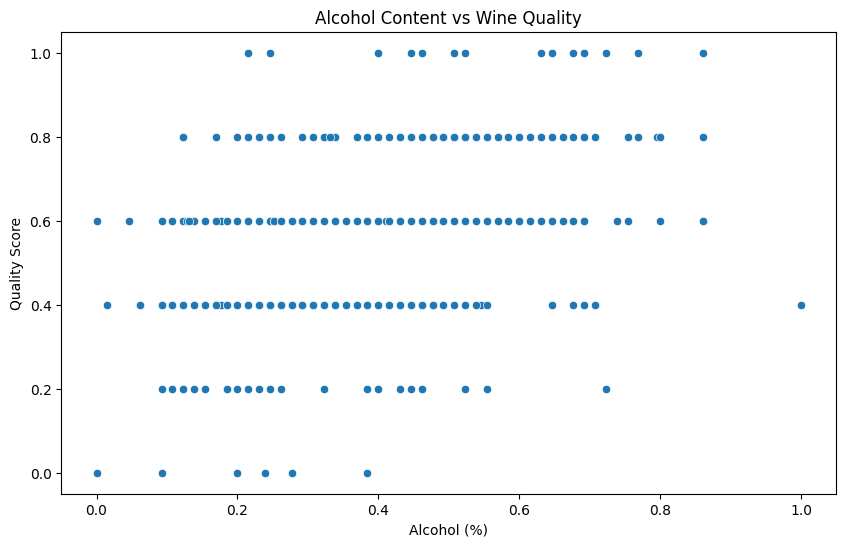

In [59]:
# 1. Scatter Plot (alcohol vs. quality)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=df)
plt.title('Alcohol Content vs Wine Quality')
plt.xlabel('Alcohol (%)')
plt.ylabel('Quality Score')
plt.show()

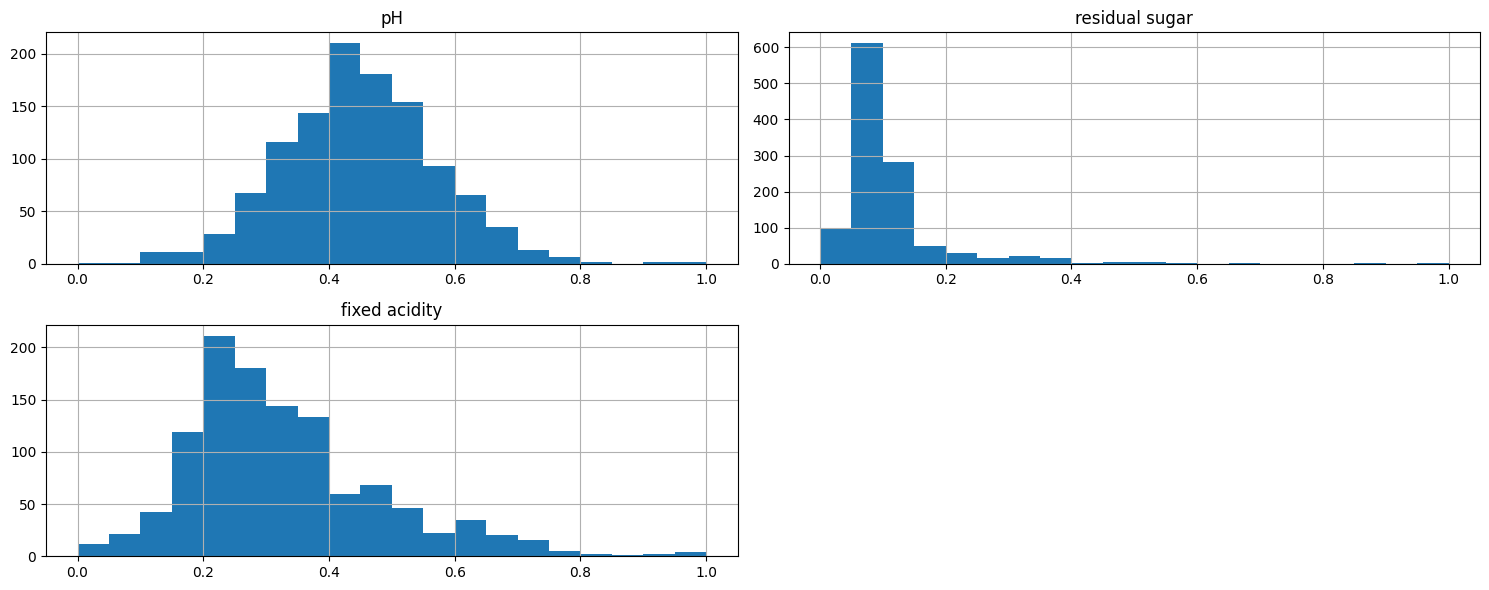

In [60]:
# 2.  Histogram (distribution of fixed acidity)
df[['pH', 'residual sugar', 'fixed acidity']].hist(bins=20, figsize=(15, 6))
plt.tight_layout()
plt.show()

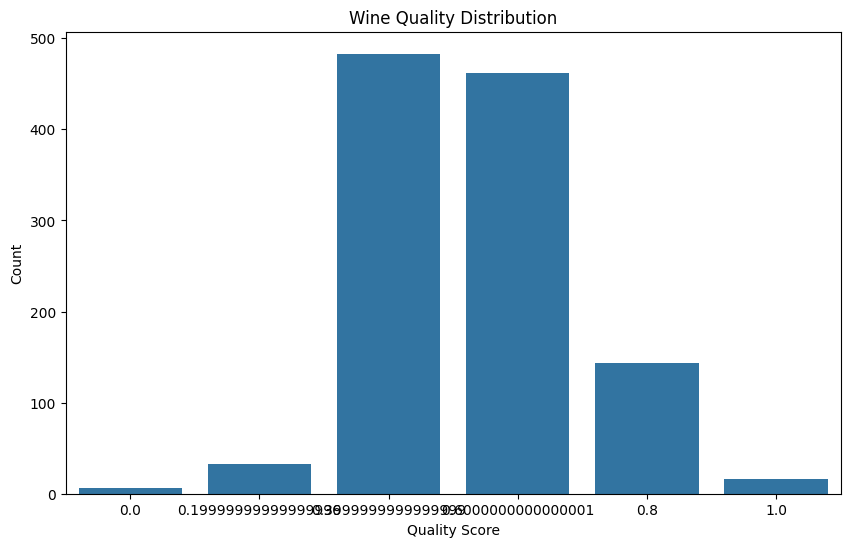

In [61]:
# 3. Bar Chart for Quality Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df)
plt.title('Wine Quality Distribution')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

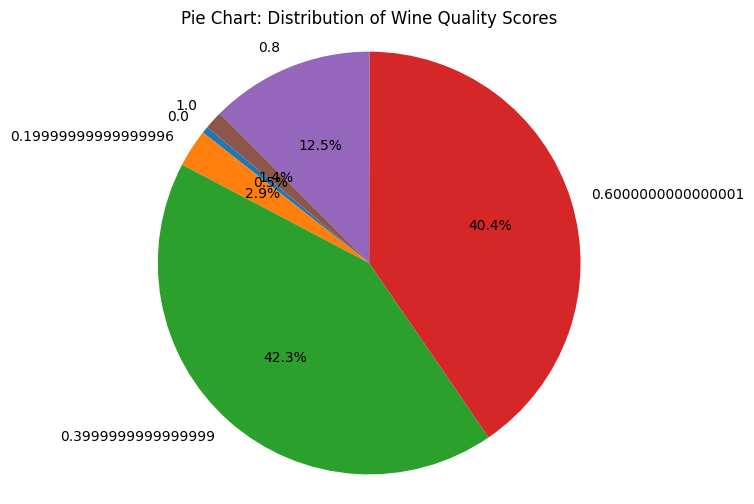

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each wine quality score, sorted by score
quality_counts = df['quality'].value_counts().sort_index()

# 4. Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart: Distribution of Wine Quality Scores')
plt.axis('equal')  
plt.show()

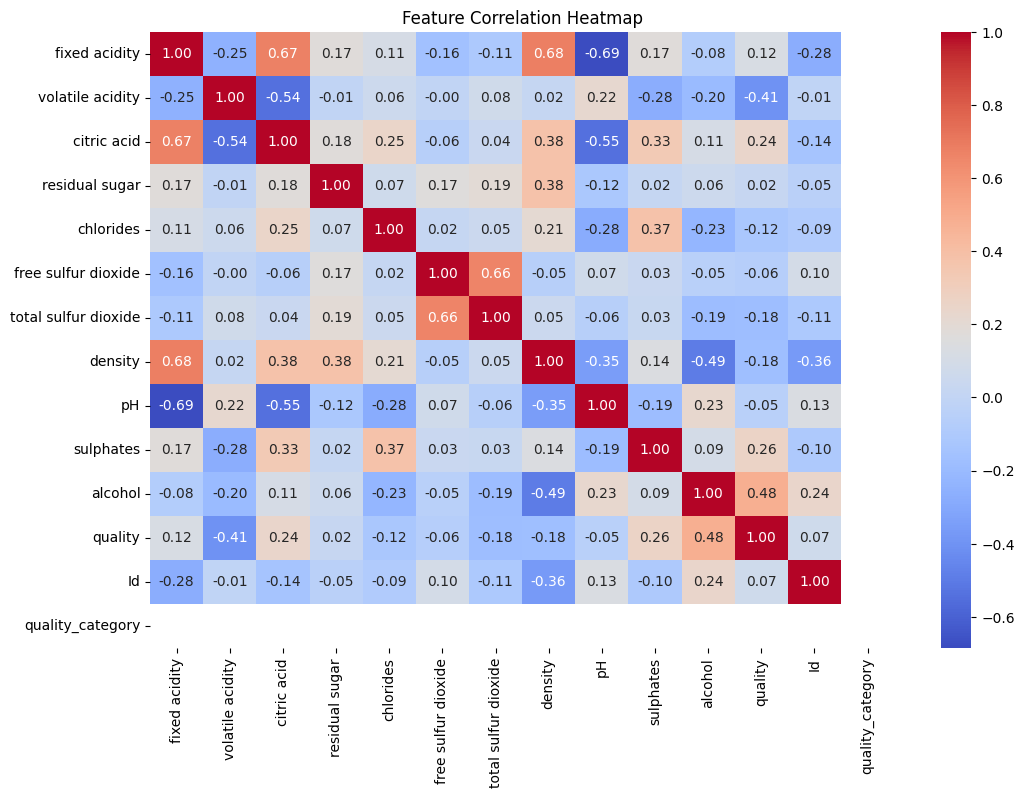

In [63]:
# 5.  Heatmap (correlation matrix)
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

## Task-3
**Data Preprocessing**

In [64]:
# 1. Handle Null Values
print("Null values before handling:")
print(df.isnull().sum())


Null values before handling:
fixed acidity              0
volatile acidity           0
citric acid                0
residual sugar             0
chlorides                  0
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
quality                    0
Id                         0
quality_category        1143
dtype: int64


In [77]:
# No null values in the provided data, but general code for handling:
df_clean = df.dropna()
print("\nNull values after handling:")
print(df_clean.isnull().sum())


Null values after handling:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
quality_category        0
dtype: int64


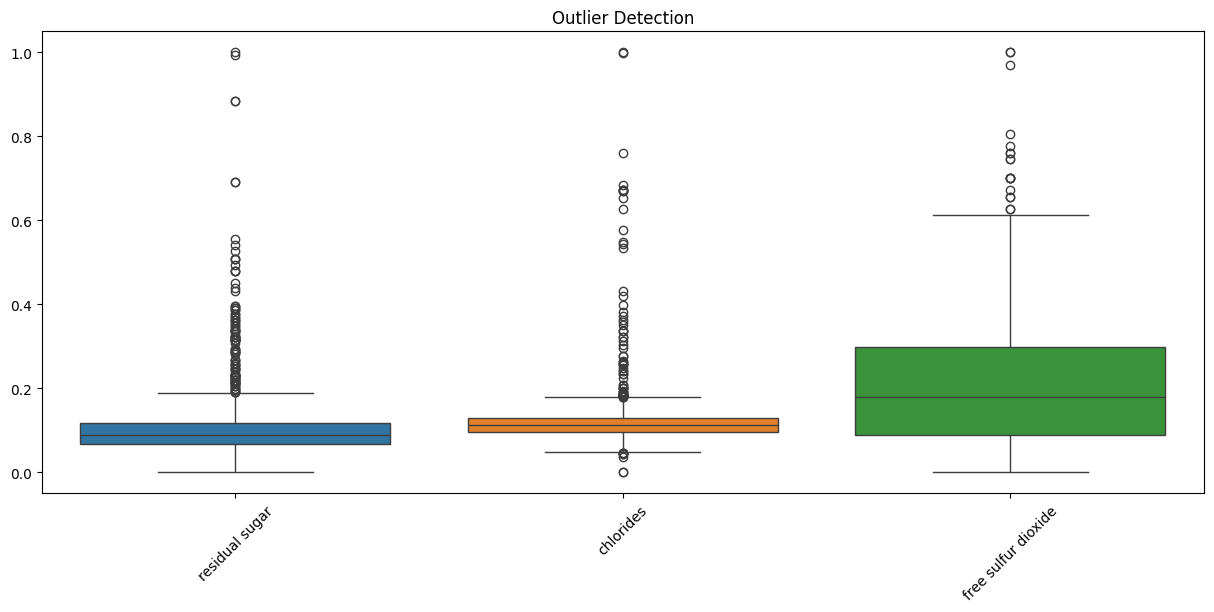

In [66]:
# 2. Outlier Detection using Boxplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[['residual sugar', 'chlorides', 'free sulfur dioxide']])
plt.title('Outlier Detection')
plt.xticks(rotation=45)
plt.show()

In [78]:
# 3. Data Scaling (Robust Scaling)
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df.drop(['quality', 'Id'], axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns.drop(['quality', 'Id']))


/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1233: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a, func=_nanmedian, keepdims=keepdims,
/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1424: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


In [80]:
# 4. Class Imbalance Check
# Create quality categories
bins = [2, 4, 6, 9]
labels = ['Low', 'Medium', 'High']
df['quality_category'] = pd.cut(df['quality'], bins=bins, labels=labels)

In [84]:
# Plot class distribution
plt.figure(figsize=(10, 6))

# Ensure 'quality_category' has valid data for plotting
if df['quality_category'].notna().any() and df['quality_category'].sum() != 0:
    # Drop NaN values before plotting
    df['quality_category'].dropna().value_counts().plot.pie(autopct='%1.1f%%')
    plt.title('Quality Class Distribution')
    plt.ylabel('')
    plt.show()
else:
    print("Cannot create pie chart: 'quality_category' column is either empty, contains only NaN values, or has a sum of zero.")

print("\nClass distribution:")
print(df['quality_category'].value_counts())

Cannot create pie chart: 'quality_category' column is either empty, contains only NaN values, or has a sum of zero.

Class distribution:
quality_category
Low       0
Medium    0
High      0
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

In [85]:
# Calculate class proportions
class_proportions = df['quality_category'].value_counts(normalize=True)
print("\nClass proportions:")
print(class_proportions)


Class proportions:
quality_category
Low      NaN
Medium   NaN
High     NaN
Name: proportion, dtype: float64


In [86]:
# Calculate imbalance ratio (assuming 'Medium' is the majority class)
imbalance_ratio = class_proportions['Medium'] / class_proportions['Low']
print("\nImbalance ratio (Medium vs Low):", imbalance_ratio)



Imbalance ratio (Medium vs Low): nan
